<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_06_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

1. Implementar el metodo de la bisección para determinar las raices de una función.
2. Implementar el metodo de la newton para determinar las raices de una función.

Prueba tu resultado para:


  
 2. $a e^{x}-2= b\cos(e^x-2)$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math as mt

In [35]:
# Metodo de bisección
def biseccion(funcion, a, b, tolerancia=1e-6, max_iter=1000):

    if funcion(a) * funcion(b) >= 0:
        raise ValueError("La función no cambia de signo en el intervalo dado.")

    iteraciones = 0

    while (b - a) / 2 > tolerancia and iteraciones < max_iter:
        c = (a + b) / 2
        if funcion(c) == 0:
            break
        elif funcion(c) * funcion(a) < 0:
            b = c
        else:
            a = c
        iteraciones += 1

    raiz = (a + b) / 2

    return raiz

f = lambda x: np.exp(x) -2 - np.cos(np.exp(x)-2)

print("La raíz encontrada por el método de bisección es:", biseccion(f, 0, 2))

La raíz encontrada por el método de bisección es: 1.007624626159668


In [34]:
# Metodo de Newton
def newton(f,df,x_0,e = 1e-100):
  x_i = x_0
  counter = 0
  while abs(f(x_i)) > e and (counter != 100):
    counter += 1
    x_i = x_i - f(x_i)/df(x_i)

  if df(x_i) == 0:
    return (x_i)

  return (x_i)

f = lambda x: np.exp(x) -2 - np.cos(np.exp(x)-2)
df = lambda x: np.exp(x) + np.sin(np.exp(x)-2)*np.exp(x)
x_0 = 1
print("La raíz encontrada por el metodo de Newton es:", newton(f,df,x_0))

La raíz encontrada por el metodo de Newton es: 1.0076239716581368


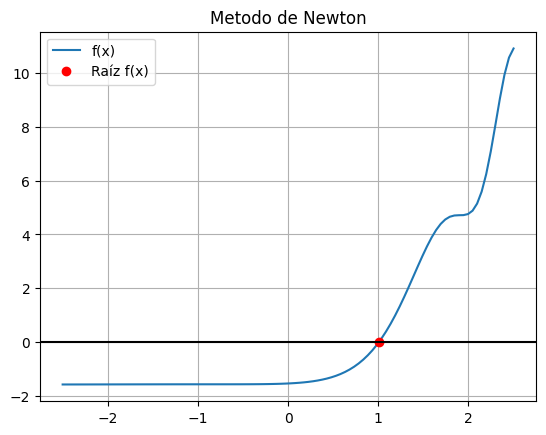

In [29]:
x = np.linspace(-2.5,2.5,100)
y = f(x)
X = newton(f,df,x_0)
Y = f(newton(f,df,x_0))


plt.plot(x,y,label="f(x)") #grafica la función a la cual se le va a aplicar el metodo de Newton
plt.plot(X,Y,"ro", label="Raíz f(x)") #grafica la raíz calculada con el metodo de Newton
plt.axhline(0, color='black', linestyle='-')
plt.title("Metodo de Newton")
plt.legend()
plt.grid()